In [82]:
import cv2
import numpy as np
import os
from PIL import Image
import pickle
import matplotlib.pyplot as plt

In [83]:
BASE_DIR = r'C:\Users\user\FacialRecognition'
image_dir= os.path.join(BASE_DIR,"images")


In [84]:
face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_alt2.xml')

In [215]:
current_id = 0
label_ids = {}
x_train = []
y_label = []

In [216]:
for root,dirs,files in os.walk(image_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
            path = os.path.join(root,file)
            label = os.path.basename(root).replace(" ","-").lower()
            # print(label,path)
            if not label in label_ids:
                label_ids[label]=current_id
                current_id+=1
            id_=label_ids[label]
            # print(label_ids)

            pil_image = Image.open(path).convert("L") #grayscale
            size=(550,550)
            final_image = pil_image.resize(size,Image.ANTIALIAS)
            image_array  = np.array(final_image,'uint8')
            # print(image_array)
            faces = face_cascade.detectMultiScale(image_array,  minNeighbors=5)

            for (x,y,w,h) in faces:
                roi = image_array[y:y+h,x:x+w]
                x_train.append(roi)
                y_label.append(id_)

In [193]:
x_train = np.array(x_train)
y_label = np.array(y_label)

In [218]:
train_x = []
for x in x_train:
    for y in x:
        train_x.append(y.tolist())

In [220]:
train_x = np.array(train_x)

ValueError: cannot reshape array of size 10441 into shape (38,187,187)

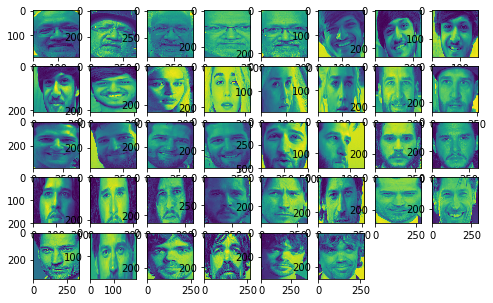

In [90]:
fig = plt.figure(figsize = (8, 8))
for i in range(38):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(x_train[i])
plt.show()

In [171]:
train_x

KeyboardInterrupt: 

In [91]:
y_label

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6])

In [92]:
with open ("labels.pickle",'wb') as f:
    pickle.dump(label_ids,f)

In [93]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [94]:
y_label = to_categorical(y_label)

In [95]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [140]:
model = Sequential()

In [141]:
model.add(Convolution2D(100, kernel_size =(7, 7), input_shape=(187,187,1), padding='same', activation='relu' , data_format="channels_last"))
# model.add(Dropout(0.2))
model.add(Convolution2D(100, kernel_size =(7, 7), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
# model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
epochs = 3 
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`
  


In [142]:
model.fit(x_train, y_label, epochs = 10)

ValueError: Error when checking input: expected conv2d_25_input to have 4 dimensions, but got array with shape (38, 1)